In [141]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report

In [142]:
wine = load_wine()
df_wine = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names']+['target'])
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [143]:
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0


In [144]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [145]:
df_wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [146]:
df_wine.target.value_counts(normalize=True).round(3)

target
1.0    0.399
0.0    0.331
2.0    0.270
Name: proportion, dtype: float64

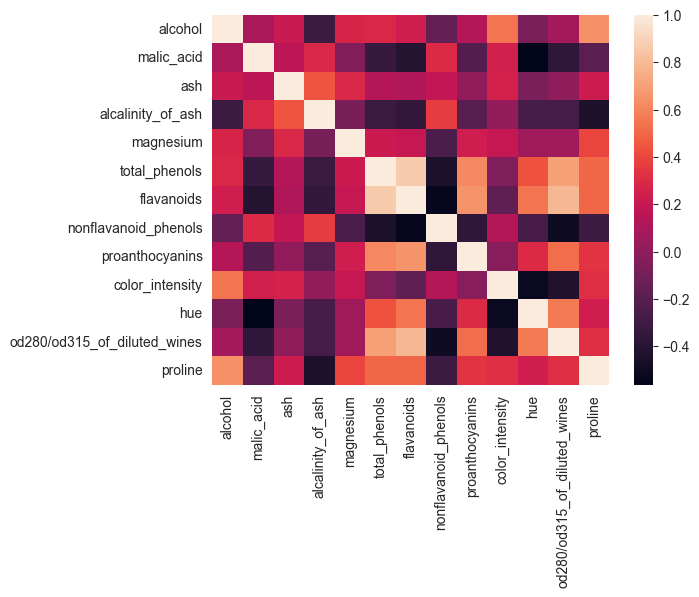

In [147]:
sns.heatmap(df_wine.iloc[:, :-1].corr())
plt.show()

In [148]:
X = wine.data
Y = wine.target

In [149]:
standardize = StandardScaler()
X_std = standardize.fit_transform(X)

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=11)

In [151]:
X_train.shape

(133, 13)

In [152]:
X_test.shape

(45, 13)

SVC

In [153]:
svc = SVC(kernel='linear', C=100, probability=True).fit(X_train, Y_train)

In [154]:
svc_pred = svc.predict(X_test)
svc_pred

array([2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0,
       1])

In [155]:
svc.predict_proba(X_test)

array([[2.03688681e-02, 1.99078291e-02, 9.59723303e-01],
       [9.91563134e-01, 4.60157534e-03, 3.83529100e-03],
       [2.07183746e-03, 9.95662964e-01, 2.26519892e-03],
       [9.90092554e-01, 1.76648175e-03, 8.14096390e-03],
       [9.84089987e-01, 2.97329053e-03, 1.29367221e-02],
       [9.40245493e-01, 1.81482276e-02, 4.16062795e-02],
       [3.96087460e-06, 9.98820155e-01, 1.17588427e-03],
       [8.24471510e-03, 9.84551157e-01, 7.20412765e-03],
       [9.08860525e-02, 9.03228057e-01, 5.88589012e-03],
       [9.99043346e-01, 9.09234742e-06, 9.47561772e-04],
       [1.04784443e-01, 4.15873812e-03, 8.91056819e-01],
       [3.33800990e-03, 9.94450661e-01, 2.21132942e-03],
       [9.46005610e-01, 2.86775873e-02, 2.53168031e-02],
       [8.03415453e-01, 1.45996397e-01, 5.05881501e-02],
       [3.98678519e-02, 8.87123215e-01, 7.30089332e-02],
       [4.49892522e-03, 9.92762886e-01, 2.73818913e-03],
       [9.89585062e-01, 1.84904650e-03, 8.56589190e-03],
       [1.33514789e-02, 6.59221

GaussianNB

In [156]:
gauss = GaussianNB(var_smoothing=0.1).fit(X_train, Y_train)

In [157]:
gauss_pred = gauss.predict(X_test)
gauss_pred

array([2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0,
       2])

In [158]:
gauss.predict_proba(X_test)

array([[1.02895433e-01, 3.95174397e-01, 5.01930171e-01],
       [9.57905146e-01, 1.98964021e-02, 2.21984523e-02],
       [1.53909376e-02, 6.90181539e-01, 2.94427524e-01],
       [9.99931421e-01, 5.60050732e-05, 1.25743591e-05],
       [9.99430233e-01, 4.00156191e-04, 1.69610411e-04],
       [9.27137599e-01, 3.33216510e-02, 3.95407503e-02],
       [8.21802635e-03, 8.51123807e-01, 1.40658166e-01],
       [1.64511592e-02, 6.75388701e-01, 3.08160140e-01],
       [7.54322291e-02, 4.28100094e-01, 4.96467677e-01],
       [9.99994070e-01, 5.40881613e-06, 5.21008247e-07],
       [4.34363619e-01, 2.24055964e-01, 3.41580417e-01],
       [1.06210581e-02, 7.84170562e-01, 2.05208380e-01],
       [9.27651053e-01, 3.30295714e-02, 3.93193758e-02],
       [5.21070050e-01, 1.90790254e-01, 2.88139696e-01],
       [4.96847743e-02, 4.76055263e-01, 4.74259963e-01],
       [3.55349159e-02, 5.24236970e-01, 4.40228114e-01],
       [9.99187296e-01, 5.58346935e-04, 2.54356900e-04],
       [9.35890379e-02, 4.04775

KNeighborsClassifier

In [159]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [160]:
pipe = Pipeline([('standardize', standardize), ('knn', knn)])
searchSpace = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
classifier = GridSearchCV(pipe, searchSpace, cv=5).fit(X_train, Y_train)
n_neighbors = classifier.best_estimator_.get_params()["knn__n_neighbors"]
n_neighbors

10

In [161]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1).fit(X_train, Y_train)

In [162]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0,
       2])

In [163]:
knn.predict_proba(X_test)

array([[0.1, 0.6, 0.3],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0.4, 0.2, 0.4],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0.5, 0.2, 0.3],
       [0. , 0.2, 0.8],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0.1, 0.5, 0.4],
       [0. , 0.7, 0.3],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.3, 0.5],
       [0.9, 0.1, 0. ],
       [0. , 0.7, 0.3],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.7, 0.3],
       [0. , 0.5, 0.5],
       [0. , 0.4, 0.6],
       [0. , 0.4, 0.6],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.3, 0.7],
       [0.3, 0.2, 0.5],
       [0. , 0.9, 0.1],
       [1. , 0. 

Confusion matrices

In [164]:
svc_cm = confusion_matrix(Y_test, svc_pred)
svc_cm

array([[18,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]])

In [165]:
gauss_cm = confusion_matrix(Y_test, gauss_pred)
gauss_cm

array([[18,  0,  0],
       [ 1, 14,  3],
       [ 1,  4,  4]])

In [166]:
knn_cm = confusion_matrix(Y_test, knn_pred)
knn_cm

array([[18,  0,  0],
       [ 1, 11,  6],
       [ 1,  3,  5]])

Classification Report (stats)

In [167]:
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.89      0.94        18
           2       0.90      1.00      0.95         9

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [168]:
print(classification_report(Y_test, gauss_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.78      0.78      0.78        18
           2       0.57      0.44      0.50         9

    accuracy                           0.80        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.79      0.80      0.79        45



In [169]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.79      0.61      0.69        18
           2       0.45      0.56      0.50         9

    accuracy                           0.76        45
   macro avg       0.71      0.72      0.71        45
weighted avg       0.77      0.76      0.75        45

